In [669]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate,KFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [670]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [671]:
set_train = pd.read_csv('data_set.csv')
test_values = pd.read_csv('data_test.csv', index_col='building_id')

In [672]:
columnas_seleccionada = ['age',
                         'geo_level_1_id',
                         'area_percentage',
                         'count_floors_pre_eq',
                         'geo_level_2_id',
                         'height_percentage',
                         'resistance',
                         'roof_type',
                         'ground_floor_type',
                         'other_floor_type',
                         'position_j', 'position_o', 
                         'position_s', 'position_t',
                          'base_condition',
                         ]

In [673]:
columnas_seleccionads = ['age',
                         'geo_level_1_id',
                         'area_percentage',
                         'count_floors_pre_eq',
                         'geo_level_2_id',
                         'height_percentage',
                         'resistance',
                         'roof_type',
                         'ground_floor_type',
                         'other_floor_type',
                         'position_j', 'position_o', 
                         'position_s', 'position_t',
                          'uso_secundario',
                         'prom_heigh_floor',
                         'base_condition',
                         ]

In [674]:
columnas_seleccionadas= ['age', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
'count_floors_pre_eq', 'area_percentage', 'height_percentage', 'count_families',
'has_secondary_use','has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental',
'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 
'has_secondary_use_health_post', 'has_secondary_use_gov_office','has_secondary_use_use_police',
'has_secondary_use_other',
'has_superstructure_rc_engineered', 'has_superstructure_rc_non_engineered', 'has_superstructure_cement_mortar_brick',
'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_mud_mortar_stone',
'has_superstructure_stone_flag', 'has_superstructure_timber', 'has_superstructure_adobe_mud', 
'has_superstructure_bamboo', 'has_superstructure_other', 
'roof_type_n', 'roof_type_q', 'roof_type_x',
'ground_floor_type_f','ground_floor_type_m',
'ground_floor_type_v','ground_floor_type_x',
'ground_floor_type_z',
'other_floor_type_j','other_floor_type_q',
'other_floor_type_s','other_floor_type_x',
'foundation_type_h', 'foundation_type_i', 
'foundation_type_r', 'foundation_type_u', 
'foundation_type_w', 'land_surface_condition_n', 
'land_surface_condition_o', 'land_surface_condition_t',
'position_j', 'position_o', 
'position_s', 'position_t',
'plan_configuration_d', 'plan_configuration_u', 
'plan_configuration_s', 'plan_configuration_q', 
'plan_configuration_m', 'plan_configuration_c', 
'plan_configuration_a', 'plan_configuration_n', 
'plan_configuration_f', 'plan_configuration_o',
'base_condition', 'prom_heigh_floor', 'uso_secundario', 
'roof_type', 'ground_floor_type', 'other_floor_type', 'resistance'
]

In [675]:
train, test = train_test_split(set_train, test_size = 0.20, shuffle = False)

In [676]:
train_values_subset = train.iloc[:, 0:-1]
train_labels = train.loc[:, 'damage_grade']

In [677]:
test_values_subset = test.iloc[:, 0:-1]
test_labels = test.loc[:, 'damage_grade']

In [678]:
# A parameter grid for XGBoost
#n_jobs=[-1]
#n_estimators=np.arange(100,1000,100)
#learning_rate=[0.03,0.01,0.1]
#max_depth=np.arange(10,100,15)
# Param grid for Xgboost
#param_grid={'n_jobs':n_jobs,
 #           'n_estimators':n_estimators,
  #          'max_depth':max_depth,
   #         'learning_rate':learning_rate
    #       }

In [679]:
#rf=XGBClassifier()
#kf=KFold(n_splits=2,shuffle=True)

In [680]:
#rs=RandomizedSearchCV(rf,param_distributions=param_grid,cv=kf,scoring='f1_micro')

In [681]:
#random_search = RandomizedSearchCV(rf_model, param_distributions=params, n_iter=500, scoring='accuracy', n_jobs=1, cv=skf.split(train_values_subset,train_labels.values.ravel()), random_state=1)

In [682]:
rf_model = XGBClassifier(n_jobs=-1,n_estimators= 400, max_depth= 10,learning_rate= 0.1, eval_metric='mlogloss', colsample_bytree = 0.9)

In [683]:
train_values_subset = pd.get_dummies(train_values_subset)

In [684]:
start_time = timer(None)
rf_model.fit(train_values_subset, train_labels.values.ravel())
timer(start_time)


 Time taken: 0 hours 7 minutes and 3.81 seconds.


In [685]:
# *----- Submit actual 0.7257
preds = rf_model.predict(test_values_subset)
f1_score(test_labels, preds, average='micro')

0.7463540067546822

In [686]:
# 0.7372965919557876      c/uso secundario submit: 0.7285
# 0.7466472247270773 .......

# 0.7462196806877495 -------- 0.740

In [687]:
test_values_subset = test_values[columnas_seleccionadas]
test_values_subset = pd.get_dummies(test_values_subset)
test_values_subset

,age,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,area_percentage,height_percentage,count_families,has_secondary_use,has_secondary_use_agriculture,...,plan_configuration_n,plan_configuration_f,plan_configuration_o,base_condition,prom_heigh_floor,uso_secundario,roof_type,ground_floor_type,other_floor_type,resistance
building_id,,,,,,,,,,,,,,,,,,,,,
300051,20,17,596,11307,3,7,6,1,0,0,...,0,0,1,1.673320,2.000000,0.0,0.703746,0.805498,0.633191,0.50
99355,25,6,141,11987,2,13,5,1,1,1,...,0,0,1,1.673320,2.500000,1.0,0.703746,0.805498,0.633191,0.50
890251,5,22,19,10044,2,4,5,1,0,0,...,0,0,1,1.673320,2.500000,0.0,0.703746,0.805498,0.633191,0.50
745817,0,26,39,633,1,19,3,2,1,0,...,0,0,1,1.673320,3.000000,0.2,0.062232,0.093682,0.150447,0.85
421793,15,17,289,7970,3,8,7,1,0,0,...,0,0,1,1.673320,2.333333,0.0,0.234022,0.805498,0.633191,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310028,70,4,605,3623,3,20,6,1,1,1,...,0,0,1,1.673320,2.000000,1.0,0.234022,0.805498,0.633191,0.80
663567,25,10,1407,11907,3,6,7,1,0,0,...,0,0,1,0.979221,2.333333,0.0,0.703746,0.805498,0.633191,1.10
1049160,50,22,1136,7712,1,3,3,1,0,0,...,0,0,1,1.673320,3.000000,0.0,0.703746,0.805498,0.150447,0.80


In [688]:
predictions = rf_model.predict(test_values_subset)

In [689]:
submission_format = pd.read_csv('submission_format.csv',index_col='building_id')

In [690]:
my_submission = pd.DataFrame(data=predictions, columns=submission_format.columns,
                            index=submission_format.index)

In [691]:
my_submission.head()

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,1
421793,3


In [692]:
my_submission.to_csv('submision.csv')

In [693]:
!head submision.csv

"head" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [694]:
rf_model.feature_importances_

array([0.0062024 , 0.0529337 , 0.01450146, 0.00801221, 0.00793865,
       0.00499511, 0.00583225, 0.00654283, 0.00615647, 0.00596899,
       0.00484369, 0.00553492, 0.00343749, 0.00344171, 0.00432981,
       0.00203742, 0.0023073 , 0.0014869 , 0.00771675, 0.00979008,
       0.00723955, 0.02572631, 0.00870499, 0.01141652, 0.03700049,
       0.01755229, 0.00752853, 0.00939998, 0.00713798, 0.00904109,
       0.01249554, 0.00737518, 0.00905052, 0.00566611, 0.00713941,
       0.06069171, 0.00794013, 0.00723467, 0.00594246, 0.00846995,
       0.00670043, 0.01086317, 0.01354675, 0.044889  , 0.28629112,
       0.0064139 , 0.01604963, 0.00553087, 0.00848428, 0.00737652,
       0.00494775, 0.00555815, 0.00548307, 0.00467394, 0.00079616,
       0.00321028, 0.00300396, 0.00374499, 0.00739058, 0.00493674,
       0.0050833 , 0.00816099, 0.00696255, 0.00543657, 0.0113363 ,
       0.0065325 , 0.00956149, 0.00705381, 0.0216163 , 0.02261113,
       0.00899028], dtype=float32)

In [695]:
# Gini importance
rf_model.feature_importances_
columnas_seleccionadas = ['age',
                         'geo_level_1_id',
                         'area_percentage',
                         'count_floors_pre_eq',
                         'geo_level_2_id',
                         'height_percentage',
                         'resistance',
                         'roof_type',
                         'ground_floor_type',
                         'other_floor_type',
                    #     'position_j', 'position_o', 
                     #    'position_s', 'position_t',
                         'owner_a', 'owner_r',
                         'owner_v', 'owner_w',
                         'base_condition']

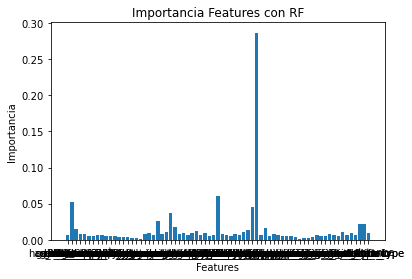

In [696]:
plt.bar(test_values_subset.columns, rf_model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.show()